### Pivot table

In [857]:
import pandas as pd
import numpy as np

In [858]:
df = pd.read_excel('Pivot.xlsx')
df.head()

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06


In [859]:
df.pivot_table(values='Sprzedaż', index='Przedstawiciel', columns='Region', aggfunc=np.sum)

Region,Południe,Wschód,Zachód,ZachódCentrum
Przedstawiciel,,,,
Franciszek,3029.98,8919.85,1608.96,NaN
Grzegorz,2040.69,4854.15,4376.02,154.34
Krystian,2228.68,7894.56,2006.31,NaN
Patryk,5769.22,5670.96,2828.02,816.84
Paulina,1954.58,6696.10,9790.96,1449.21
Szymon,4791.80,3633.19,4168.15,NaN


In [860]:
df.pivot_table(values='Sprzedaż', index='Przedstawiciel', columns='Region', aggfunc=np.sum).fillna(0).round(2)

Region,Południe,Wschód,Zachód,ZachódCentrum
Przedstawiciel,,,,
Franciszek,3029.98,8919.85,1608.96,0.00
Grzegorz,2040.69,4854.15,4376.02,154.34
Krystian,2228.68,7894.56,2006.31,0.00
Patryk,5769.22,5670.96,2828.02,816.84
Paulina,1954.58,6696.10,9790.96,1449.21
Szymon,4791.80,3633.19,4168.15,0.00


In [861]:
df.pivot_table(values='Sprzedaż', index=['Region', 'Przedstawiciel'], aggfunc=np.sum).round(2)

Sprzedaż
Region        Przedstawiciel          
Południe      Franciszek       3029.98
              Grzegorz         2040.69
              Krystian         2228.68
              Patryk           5769.22
              Paulina          1954.58
              Szymon           4791.80
Wschód        Franciszek       8919.85
              Grzegorz         4854.15
              Krystian         7894.56
              Patryk           5670.96
              Paulina          6696.10
              Szymon           3633.19
Zachód        Franciszek       1608.96
              Grzegorz         4376.02
              Krystian         2006.31
              Patryk           2828.02
              Paulina          9790.96
              Szymon           4168.15
ZachódCentrum Grzegorz          154.34
              Patryk            816.84
              Paulina          1449.21

In [862]:
df.pivot_table(values='Sprzedaż', index='Region', aggfunc=[len,np.max,np.min]).round(2)

,len,amax,amin
,Sprzedaż,Sprzedaż,Sprzedaż
Region,,,
Południe,27,1512.19,114.53
Wschód,50,1674.82,152.76
Zachód,24,5000.60,132.34
ZachódCentrum,4,1449.21,154.34


### Apply

In [863]:
def commission_fee(x):
    if x <= 300:
        return 0
    elif x <=900:
        return x*0.03
    else:
        return x * 0.06

df['commision_fee']= df['Sprzedaż'].apply(lambda x: commission_fee(x))
df

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666
...,...,...,...,...,...,...,...,...,...
100,2020-01-29,Bellen,Wschód,Krystian,AST,50,1100.14,500.16,66.0084
101,2020-01-29,Quad,Wschód,Grzegorz,PLOT,10,270.50,145.57,0.0000
102,2020-01-30,Sunshine,Południe,Szymon,TTT,23,437.81,184.16,13.1343
103,2020-01-30,Quad,Południe,Szymon,TTT,25,675.75,362.89,20.2725


In [864]:
df['Produkt-len'] = df['Produkt'].apply(len)
df

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651,4
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,6
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,4
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666,8
...,...,...,...,...,...,...,...,...,...,...
100,2020-01-29,Bellen,Wschód,Krystian,AST,50,1100.14,500.16,66.0084,6
101,2020-01-29,Quad,Wschód,Grzegorz,PLOT,10,270.50,145.57,0.0000,4
102,2020-01-30,Sunshine,Południe,Szymon,TTT,23,437.81,184.16,13.1343,8
103,2020-01-30,Quad,Południe,Szymon,TTT,25,675.75,362.89,20.2725,4


In [865]:
import math

In [866]:
df['#_opakowań'] = df['Sztuki'].apply(lambda x: math.ceil(x/5))
df

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651,4,4
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,6,5
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,4,6
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6,4
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666,8,8
...,...,...,...,...,...,...,...,...,...,...,...
100,2020-01-29,Bellen,Wschód,Krystian,AST,50,1100.14,500.16,66.0084,6,10
101,2020-01-29,Quad,Wschód,Grzegorz,PLOT,10,270.50,145.57,0.0000,4,2
102,2020-01-30,Sunshine,Południe,Szymon,TTT,23,437.81,184.16,13.1343,8,5
103,2020-01-30,Quad,Południe,Szymon,TTT,25,675.75,362.89,20.2725,4,5


In [867]:
# (Sprzedaż-Koszty)/Sprzedaż
def bonus(row):
    margin = (row['Sprzedaż'] - row['Koszty']) / row['Sprzedaż']
    if margin > 0.55:
        return 200
    else:
        return 0

df['Bonus'] = df.apply(lambda row: bonus(row), axis=1)
df.sample(10)

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus
71,2020-01-21,Sunset,Południe,Paulina,HHH,13,273.10,120.64,0.0000,6,3,200
12,2020-01-06,Sunshine,Wschód,Franciszek,PSA,54,1026.96,432.75,61.6176,8,11,200
89,2020-01-26,Bellen,Zachód,Paulina,FRED,61,5000.60,610.16,300.0360,6,13,200
14,2020-01-06,Carlota,Zachód,Szymon,KPSA,18,414.11,198.71,12.4233,7,4,0
26,2020-01-09,Bellen,Południe,Szymon,QT,15,330.61,150.43,9.9183,6,3,0
35,2020-01-10,Quad,Zachód,Patryk,KBTB,65,1755.71,942.93,105.3426,4,13,0
88,2020-01-26,Sunset,Południe,Szymon,DFGH,44,924.29,407.31,55.4574,6,9,200
68,2020-01-21,Quad,Wschód,Krystian,FM,58,1566.83,841.43,94.0098,4,12,0
66,2020-01-20,Bellen,Wschód,Grzegorz,PSA,10,220.18,100.84,0.0000,6,2,0
82,2020-01-23,Sunshine,Południe,Krystian,T,49,931.09,392.91,55.8654,8,10,200


### Map

In [868]:
car_dict = dict(zip(df['Przedstawiciel'].unique(),['Mazda','Toyota','BMW','Audi','Fiat','Seat']))
car_dict

{'Szymon': 'Mazda',
 'Grzegorz': 'Toyota',
 'Paulina': 'BMW',
 'Krystian': 'Audi',
 'Franciszek': 'Fiat',
 'Patryk': 'Seat'}

In [869]:
df['Marka_samochodu'] = df['Przedstawiciel'].map(car_dict)
df

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus,Marka_samochodu
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651,4,4,0,Mazda
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,6,5,0,Toyota
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,4,6,0,BMW
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6,4,0,BMW
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666,8,8,200,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-01-29,Bellen,Wschód,Krystian,AST,50,1100.14,500.16,66.0084,6,10,0,Audi
101,2020-01-29,Quad,Wschód,Grzegorz,PLOT,10,270.50,145.57,0.0000,4,2,0,Toyota
102,2020-01-30,Sunshine,Południe,Szymon,TTT,23,437.81,184.16,13.1343,8,5,200,Mazda
103,2020-01-30,Quad,Południe,Szymon,TTT,25,675.75,362.89,20.2725,4,5,0,Mazda


### Applaymap

In [870]:
df.applymap(lambda x: x.upper() if isinstance(x,str) else x)

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus,Marka_samochodu
0,2020-01-01,QUAD,WSCHÓD,SZYMON,AA,16,432.17,232.99,12.9651,4,4,0,MAZDA
1,2020-01-02,BELLEN,POŁUDNIE,GRZEGORZ,KBTB,24,528.50,240.35,15.8550,6,5,0,TOYOTA
2,2020-01-02,QUAD,ZACHÓD,PAULINA,AST,30,810.71,435.64,24.3213,4,6,0,BMW
3,2020-01-02,BELLEN,ZACHÓD,PAULINA,SFWK,19,418.54,190.05,12.5562,6,4,0,BMW
4,2020-01-03,SUNSHINE,WSCHÓD,PAULINA,FM,38,722.22,304.06,21.6666,8,8,200,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-01-29,BELLEN,WSCHÓD,KRYSTIAN,AST,50,1100.14,500.16,66.0084,6,10,0,AUDI
101,2020-01-29,QUAD,WSCHÓD,GRZEGORZ,PLOT,10,270.50,145.57,0.0000,4,2,0,TOYOTA
102,2020-01-30,SUNSHINE,POŁUDNIE,SZYMON,TTT,23,437.81,184.16,13.1343,8,5,200,MAZDA
103,2020-01-30,QUAD,POŁUDNIE,SZYMON,TTT,25,675.75,362.89,20.2725,4,5,0,MAZDA


### Accesror methods

##### .dt

In [871]:
df['Data'] = pd.to_datetime(df['Data'])
df['Data'].dt.day_name().head()

0    Wednesday
1     Thursday
2     Thursday
3     Thursday
4       Friday
Name: Data, dtype: object

In [872]:
df['Data'].dt.month_name().head()

0    January
1    January
2    January
3    January
4    January
Name: Data, dtype: object

In [873]:
df['Data'].dt.is_month_start.head()

0     True
1    False
2    False
3    False
4    False
Name: Data, dtype: bool

In [874]:
df[df['Data'].dt.day_name()=='Thursday'].head()

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus,Marka_samochodu
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,6,5,0,Toyota
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,4,6,0,BMW
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6,4,0,BMW
22,2020-01-09,Carlota,Wschód,Franciszek,WSD,38,874.45,418.69,26.2335,7,8,0,Fiat
23,2020-01-09,Bellen,Wschód,Paulina,EPP,40,880.38,400.89,26.4114,6,8,0,BMW


In [875]:
df[df['Data'].dt.is_leap_year==True].head() # rok przestępczy

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus,Marka_samochodu
0,2020-01-01,Quad,Wschód,Szymon,AA,16,432.17,232.99,12.9651,4,4,0,Mazda
1,2020-01-02,Bellen,Południe,Grzegorz,KBTB,24,528.50,240.35,15.8550,6,5,0,Toyota
2,2020-01-02,Quad,Zachód,Paulina,AST,30,810.71,435.64,24.3213,4,6,0,BMW
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6,4,0,BMW
4,2020-01-03,Sunshine,Wschód,Paulina,FM,38,722.22,304.06,21.6666,8,8,200,BMW


##### .str

In [876]:
df['Produkt'].str.upper().head()

0        QUAD
1      BELLEN
2        QUAD
3      BELLEN
4    SUNSHINE
Name: Produkt, dtype: object

In [877]:
df['Region'].str.endswith('ód').head()

0     True
1    False
2     True
3     True
4     True
Name: Region, dtype: bool

In [878]:
df[df['Region'].str.contains('Zachód')].sample(5)

,Data,Produkt,Region,Przedstawiciel,Klient,Sztuki,Sprzedaż,Koszty,commision_fee,Produkt-len,#_opakowań,Bonus,Marka_samochodu
19,2020-01-07,Sunset,Zachód,Paulina,WT,53,1113.70,490.31,66.8220,6,11,200,BMW
3,2020-01-02,Bellen,Zachód,Paulina,SFWK,19,418.54,190.05,12.5562,6,4,0,BMW
21,2020-01-08,Quad,Zachód,Krystian,HII,16,432.67,232.20,12.9801,4,4,0,Audi
104,2020-01-30,Sunshine,Zachód,Grzegorz,DFR,49,931.49,392.84,55.8894,8,10,200,Toyota
77,2020-01-22,Bellen,Zachód,Szymon,YTR,35,770.18,350.66,23.1054,6,7,0,Mazda


In [879]:
df['Region'].str.zfill(10).sample(5)

82    00Południe
59    0000Wschód
85    0000Wschód
36    0000Wschód
88    00Południe
Name: Region, dtype: object

##### Zadanie: przestępczość
1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [949]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [969]:
df['id']=1
dfr = df.pivot_table(values='id', index=['race','signs_of_mental_illness'], aggfunc=len)
dfr

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [970]:
dfr['percent'] = dfr.groupby(level='race').apply(lambda x: (x / x.sum()).round(2))
dfr

C:\Users\magda\AppData\Local\Temp\ipykernel_14396\3041030122.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfr['percent'] = dfr.groupby(level='race').apply(lambda x: (x / x.sum()).round(2))


id  percent
race signs_of_mental_illness               
A    False                      69     0.74
     True                       24     0.26
B    False                    1114     0.86
     True                      184     0.14
H    False                     745     0.83
     True                      157     0.17
N    False                      64     0.82
     True                       14     0.18
O    False                      37     0.77
     True                       11     0.23
W    False                    1763     0.71
     True                      713     0.29

In [980]:
dfr.reset_index(inplace=True)
dfr

,index,race,signs_of_mental_illness,id,percent
0,0,A,False,69,0.74
1,1,A,True,24,0.26
2,2,B,False,1114,0.86
3,3,B,True,184,0.14
4,4,H,False,745,0.83
5,5,H,True,157,0.17
6,6,N,False,64,0.82
7,7,N,True,14,0.18
8,8,O,False,37,0.77
9,9,O,True,11,0.23


In [988]:
dfr = dfr[(dfr['signs_of_mental_illness']==True)].sort_values(by='percent',ascending=False)
print(f'Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa {dfr.iloc[0,1]}.')


Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa W.


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [922]:
df['date'] = pd.to_datetime(df['date'])
dfd_dic = dict(zip(df['date'],df['date'].dt.day_name()))
df['week_day'] = df['date'].map(dfd_dic)
df.rename(columns={'state':'ansi'}, inplace=True)
df[:5]

,id,name,date,manner_of_death,armed,age,gender,race,city,ansi,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,1,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,1,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,1,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


            id
week_day      
Monday     726
Tuesday    816
Wednesday  829
Thursday   810
Friday     761
Saturday   721
Sunday     753


<AxesSubplot: xlabel='week_day'>

<Figure size 640x480 with 0 Axes>

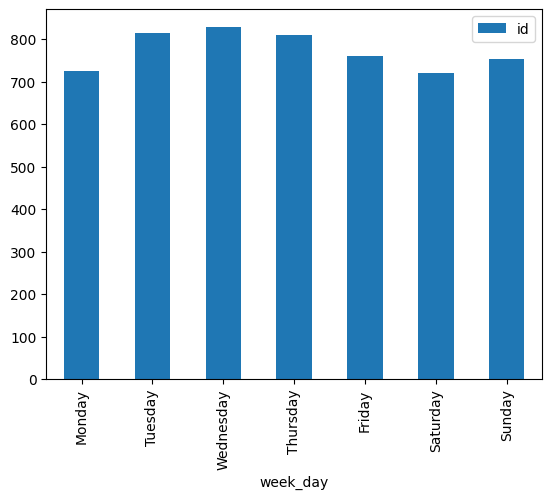

In [941]:
import matplotlib.pyplot as plt
sort=[ 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# dfch=df.groupby(['week_day']).sum()
dfch=df.groupby('week_day').agg({'id':'sum'}).reindex(sort)
print(dfch)
plt.figure()
dfch.plot(kind="bar")


5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [885]:
dfpop = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population',header=0)
dfpop = dfpop[0]
dfpop.rename(columns={'State':'state','Population estimate, July 1, 2019 [2]':'population'}, inplace=True)
dfpop.drop(['Rank in states & territories, 2019',	'Rank in states & territories, 2010',	'Census population, April 1, 2010 [3]',	
'Percent change, 2010–2019 [note 1]',	'Absolute change, 2010-2019', 'Total seats in the U.S. House of Representatives, 2013–2023',	
'Estimated population per electoral vote, 2019 [note 2]',	'Estimated population per House seat, 2019',	
'Census population per House seat, 2010',	'Percent of the total U.S. population, 2018 [note 3]'], axis=1, inplace=True)
dfpop[:5]

,state,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


In [886]:
dfabr = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=2)
dfabr = dfabr[0]
dfabr.rename(columns={'ISO':'state','Unnamed: 3':'ansi'}, inplace=True)
dfabr.drop(['ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)',
'Unnamed: 4','Unnamed: 2','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1, inplace=True)
dfabr.drop(np.arange(0,8),inplace=True)
dfabr[:5]


,state,ansi
8,United States of America,US
9,Alabama,AL
10,Alaska,AK
11,Arizona,AZ
12,Arkansas,AR


In [887]:
df = pd.merge(df,dfabr,how='inner', on='ansi')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,ansi,signs_of_mental_illness,threat_level,flee,body_camera,week_day,state
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington
1,1,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington
2,1,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington
3,1,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington
4,1,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,1,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,Tuesday,Vermont
5412,1,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,Thursday,Rhode Island
5413,1,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,Monday,Rhode Island
5414,1,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,Thursday,Rhode Island


In [888]:
df = pd.merge(df,dfpop, how='inner', on='state')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,ansi,signs_of_mental_illness,threat_level,flee,body_camera,week_day,state,population
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7614893
1,1,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,Tuesday,Washington,7614893
2,1,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,Thursday,Washington,7614893
3,1,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,Tuesday,Washington,7614893
4,1,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,Monday,Washington,7614893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,1,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,Tuesday,Vermont,623989
5412,1,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,Thursday,Rhode Island,1059361
5413,1,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,Monday,Rhode Island,1059361
5414,1,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,Thursday,Rhode Island,1059361


In [889]:
type(df['population'])

pandas.core.series.Series

In [890]:
df = df.pivot_table(values='id',index=['state','population'], aggfunc=np.sum)
# dfp['inter_per_1000_people'] = dfp.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
df.reset_index(inplace=True)
df

,state,population,id
0,Alabama,4903185,104
1,Alaska,731545,39
2,Arizona,7278717,254
3,Arkansas,3017825,83
4,California,39512223,799
5,Colorado,5758736,195
6,Connecticut,3565287,21
7,Delaware,973764,13
8,District of Columbia,705749,13
9,Florida,19453561,350


In [891]:
# df['id']=pd.to_numeric(df['id'])
# df['state']=pd.to_numeric(df['state'])
# df['population']=pd.to_numeric(df['population'])
def i_people(row):
    people=(row['id']*1000)/(row['population'])
    return people
df['id_per_1000_people']=df.apply(lambda row: i_people(row), axis=1).round(3)
# type(df['id'])
# type(df['population'])
df

,state,population,id,id_per_1000_people
0,Alabama,4903185,104,0.02
1,Alaska,731545,39,0.05
2,Arizona,7278717,254,0.03
3,Arkansas,3017825,83,0.03
4,California,39512223,799,0.02
5,Colorado,5758736,195,0.03
6,Connecticut,3565287,21,0.01
7,Delaware,973764,13,0.01
8,District of Columbia,705749,13,0.02
9,Florida,19453561,350,0.02
